<br><br><center><h1 style="font-size:2em;color:#2467C0">Project: Write a Data Science Blog Post</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Seattle_from_Kerry_Park_%281%29.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This Notebook  contains the code, results and insights from the analysis of the "Seattle Airbnb Open Dataset" which is part of the Project: "Write a Data Science Blog Post" of Udacity's Data Science NanoDegree Program. 
<br>
<br>
<br>
The data for this project was downloaded from kaggle's website and is available at the following link: https://www.kaggle.com/airbnb/seattle
<br>
<br>
<h1 style="font-size:1em;color:#2467C0">This Jupyter Notebook was created by: Gustavo Cedeño</h1>

</tr>
</table>

## Table of Contents
<ul>
    
<li><a href='#intro'>Introduction</a></li>
    <ul>
      <li><a href='#definition'>Problem Definition</a></li>
</ul>
    
    
<li><a href='#intro'>Project Description</a></li>
    <ul>
      <li><a href='#datasource'>DataSource</a></li>
      <li><a href='#requirements'> Required Libraries </a></li>
</ul>

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
      <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#profil'>Data Profiling</a></li>
      <li><a href='#cleaning'>Assessing and Cleaning Data</a></li>
     
</ul>

<li><a href='#EDA'>Exploratory Data Analysis</a></li>
    <ul>
      <li><a href='#explore'>Exploring Data</a></li>
      <li><a href='#visuals'>Creating Visualizations</a></li>
      <li><a href='#p_insights'>Preliminary Insights</a></li>
          
</ul>

<li><a href='#model'> Model and Predictive Data Analysis</a></li>
    <ul>
      <li><a href='#preprocess'>Data Preparation</a></li>
      <li><a href='#implementation'>Model Implementation</a></li>
      <li><a href='#evaluation'>Evaluating Model Performance</a></li>
  </ul>
   
<li><a href='#results'>Results</a></li>

<li><a href='#reference'>References</a></li> 

<a id='intro'></a>
# Introduction

>This Notebook  contains the code, results and insights from the analysis of the "Seattle Airbnb Open Dataset" which is part of the Project: "Write a Data Science Blog Post" of Udacity's Data Science NanoDegree Program. The main task is to use one of the open Airbnb datasets available at Kaggle to create a Github repo and blog post as final deliverables.

<a id='definition'></a>
## Problem Definition

> For this project, I was interested in using the Seattle Airbnb data to answer the following business questions: 
>
>1.	Seasonal Variations: How price changes through the year? 
>2.	Occupancy rates: What are the busiest times of the year to visit Seattle?
>3.	Popular accommodation types: What are the accommodation options available in Seattle?
>4.	Location: Are there significant price variations depending on the neighborhood? Which are the areas with the highest average prices? 
>5.	Predicting prices: What factors have a stronger influence on price? 

<a id='projectdetails'></a>
# Project Description
>Main task: Analysing a dataset following the CRISP-DM process in finding solutions and write a blog post sharing the main  insights.

> **Key Steps for the Project**
>
>1. Pick a dataset.
>2. Pose at least three questions related to business or real-world applications of how the data could be used.
>3. Create a Jupyter Notebook, using any associated packages you'd like, to:
>
>Prepare data:
>
>* Gather necessary data to answer your questions
>* Handle categorical and missing data
>* Provide insight into the methods you chose and why you chose them
>* Analyze, Model, and Visualize
>* Provide a clear connection between your business questions and how the data answers them.
>4. Communicate your business insights:

>Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind.
Create a blog post to share your questions and insights with a non-technical audience.
>
>Final deliverables will be a Github repo and a blog post. 

<a id='datasource'></a>
## Data Source
> The complete data for this project was taken from kaggle's website and is availabe at the following link: [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle)

<a id='requirements'></a>
## Required Libraries 

In [1]:
# library to handle data in a vectorized manner
import numpy as np 
# library for data analysis
import pandas as pd 
import pandas_profiling

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#content extraction from a zip file 
import zipfile 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
#for preserving dataframes
import pickle

#importing specific libraries for modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

print('All Required Libraries Imported.\n')

print("System and libraries version:\n")
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import pandas; print("Pandas",pandas.__version__)

All Required Libraries Imported.

System and libraries version:

Windows-10-10.0.17134-SP0
Python 3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
Scikit-Learn 0.20.2
NumPy 1.15.4
SciPy 1.1.0
Pandas 0.23.4


<a id='wrangling'></a>
# Data Wrangling
>>Data wrangling, which consists of the following tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing the wrangled data

<a id='gathering'></a>
## Gathering Data
> Data was previously downloaded from kaggle's website as a zipfile and then each independent csv file was extracted and converted into a pandas dataframe. 

In [2]:
with zipfile.ZipFile('seattle.zip','r') as seattle:
    seattle.extractall()

In [3]:
seattle_files = seattle.infolist()
seattle_files

[<ZipInfo filename='listings.csv' compress_type=deflate file_size=16871061 compress_size=3737330>,
 <ZipInfo filename='reviews.csv' compress_type=deflate file_size=36592035 compress_size=13135751>,
 <ZipInfo filename='calendar.csv' compress_type=deflate file_size=36650955 compress_size=3536858>]

In [4]:
#Listings: including full accommodation descriptions and average review score
df_list = pd.read_csv(seattle_files[0].filename)
print(df_list.shape)
df_list.head(3)

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
#Reviews: reviewer's comments 
df_rev = pd.read_csv(seattle_files[1].filename)
print(df_rev.shape)
df_rev.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
#Calendar: price and availability for that day
df_cal = pd.read_csv(seattle_files[2].filename)
print(df_cal.shape)
df_cal.head(3)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


<a id='profil'></a>
## Data Profiling
> Before going deeper into the analysis, let's start with a quick data understanding. In this part of the project I'll make use of the pandas_profiling functionality as a simpe and fast way to perform exploratory data analysis of a pandas Dataframe. 

In [7]:
#Data Profile Report for Listings: descriptions and average review score
profile_listings = pandas_profiling.ProfileReport(df_list)
#Exporting to HTML for better visualization
#profile_listings.to_file(outputfile="Seattle_listings_data_profiling.html")
profile_listings

Number of variables,92
Number of observations,3818
Total Missing (%),8.5%
Total size in memory,2.7 MiB
Average record size in memory,736.0 B
Numeric,25
Categorical,51
Boolean,0
Date,0
Text (Unique),2
Rejected,14


In [8]:
#Data Profile Report for reviews: unique id for each reviewer and detailed commments
profile_reviews = pandas_profiling.ProfileReport(df_rev)
#Exporting to HTML for better visualization
#profile_reviews.to_file(outputfile="Seattle_reviews_data_profiling.html")
profile_reviews

Number of variables,6
Number of observations,84849
Total Missing (%),0.0%
Total size in memory,3.9 MiB
Average record size in memory,48.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [9]:
#Data Profile Report for calendar: listing id, price and availability for that day
profile_calendar = pandas_profiling.ProfileReport(df_cal)
#Exporting to HTML for better visualization
#profile_calendar.to_file(outputfile="Seattle_calendar_data_profiling.html")
profile_calendar

Number of variables,4
Number of observations,1393570
Total Missing (%),8.2%
Total size in memory,42.5 MiB
Average record size in memory,32.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<a id='cleaning'></a>
## Assessing and Cleaning Data
> **Listings:** there are 92 variables in this dataframe and not all of them are relevant for the analysis, are not easy to interpret or have too many missing values, so, to start with, I will create a new listings df containing only the relevant features(up to this point). Then change data types and handle missing values if any. 

>**Reviews:** there are no missing values, but some variables need to be changed to a suitable data type, like for instance date must be a datatime type. Information about reviewers is not needed for answering the proposed business questions, so I will drop the columns `reviewer_name` and `reviewer_id`. 

>**Calendar:** some variables have inappropriate data types; date must be datetimestamp and price should be numeric. 

>**Listings** and **Calendar** contain the most interesting data for this analysis. So, I will focus on cleaning those two datasets.

In [10]:
#Selecting features for new listings df
list_vars =['id','accommodates','bathrooms','bedrooms','beds','cancellation_policy','host_is_superhost','property_type', 
          'room_type','neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude', 'price']

df_list_new = df_list[list_vars]
df_list_new.head()

,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,f,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,$85.00
1,953595,4,1.0,1.0,1.0,strict,t,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,$150.00
2,3308979,11,4.5,5.0,7.0,strict,f,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,$975.00
3,7421966,3,1.0,0.0,2.0,flexible,f,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,$100.00
4,278830,6,2.0,3.0,3.0,strict,f,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,$450.00


In [11]:
#Quick profile check of the resulting df
pandas_profiling.ProfileReport(df_list_new)

Number of variables,15
Number of observations,3818
Total Missing (%),0.8%
Total size in memory,447.5 KiB
Average record size in memory,120.0 B
Numeric,7
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


* `host_is_superhost`: replace "t" and "f" with numeric values for later calculations.
* `price`: get rid of the $ string and convert to numeric. 
*  Missing values: `host_is_superhost`:impute the 2 missing values with false(0). `neighbourhood`: if not given, take the corresponding value from `neighbourhood_cleansed`. Impute other numeric values with the mean of the column(if it makes sense!)

In [12]:
df_list_new.replace({'host_is_superhost':{'t':1,'f':0}},inplace=True)
df_list_new['host_is_superhost'].fillna(value=0, inplace =True)
print(df_list_new['host_is_superhost'].isnull().sum())
df_list_new['host_is_superhost'].values

0


C:\Users\Gustavo\Anaconda3\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
C:\Users\Gustavo\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([0., 1., 0., ..., 0., 0., 0.])

In [13]:
#Function for fixing values in  price column
def fix_prices(df):
    '''Function that takes a dataframe as input argument containing a column with price information.
    Get rid of the $ sign and converts the string of numbers to numeric type'''
    
    df['price'] = df['price'].str.replace('$','').str.replace(',','');
    df['price'] = pd.to_numeric(df['price']);

In [14]:
fix_prices(df_list_new)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
#Checking the changes
df_list_new.head()

,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,85.0
1,953595,4,1.0,1.0,1.0,strict,1.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,150.0
2,3308979,11,4.5,5.0,7.0,strict,0.0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,975.0
3,7421966,3,1.0,0.0,2.0,flexible,0.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,100.0
4,278830,6,2.0,3.0,3.0,strict,0.0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,450.0


In [16]:
#make equal to neighbourhood_cleansed when value is missing
df_list_new['neighbourhood'].fillna(value=df_list_new['neighbourhood_cleansed'], inplace =True)
df_list_new['neighbourhood'].isnull().sum()

0

In [17]:
#drop the row without a property_type description
df_list_new.dropna(subset=['property_type'],how='any',axis=0,inplace=True)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#Filling NaNs with the mean values in the column
nan_cols = ['bathrooms','bedrooms','beds']
for col in nan_cols:
    df_list_new[col].fillna(value=round(df_list_new[col].mean()),inplace=True)
df_list_new.isnull().sum()

id                              0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
cancellation_policy             0
host_is_superhost               0
property_type                   0
room_type                       0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
price                           0
dtype: int64

In [19]:
#Reviews dataframe
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [20]:
#cleaning operations
df_rev.drop(['reviewer_id','reviewer_name'],axis=1,inplace=True)
df_rev['date'] = df_rev['date'].astype('datetime64[ns]')
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 4 columns):
listing_id    84849 non-null int64
id            84849 non-null int64
date          84849 non-null datetime64[ns]
comments      84831 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.6+ MB


In [21]:
#calendar dataframe
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [22]:
#fixing the price values using "fix_prices" function
fix_prices(df_cal)
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [23]:
#proper data type for 'date'
df_cal['date'] = df_cal['date'].astype('datetime64[ns]')
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [24]:
#Creating a copy of the calendar data for 
df_cal_copy = df_cal.copy()

In [25]:
#Creating occupancy df before droping rows with missing price values
df_cal_copy['available'] = df_cal_copy['available'].map(lambda x:1 if x == 't' else 0)
df_occup = df_cal_copy[['date','available']].groupby('date',as_index=False).mean()
df_occup['occupancy'] = 1-df_occup['available']
print(df_occup.shape)
df_occup.head()

(365, 3)


,date,available,occupancy
0,2016-01-04,0.454426,0.545574
1,2016-01-05,0.488999,0.511001
2,2016-01-06,0.478261,0.521739
3,2016-01-07,0.465165,0.534835
4,2016-01-08,0.466737,0.533263


In [26]:
#drop rows without price
df_cal.dropna(subset=['price'],how='any',axis=0,inplace=True)
df_cal.isnull().any()

listing_id    False
date          False
available     False
price         False
dtype: bool

In [27]:
#Saving the dfs for later use
file_Name1 = "df_list_clean.pkl"
file_Name2 = "df_rev_clean.pkl"
file_Name3 = "df_cal_clean.pkl"
file_Name4 = "df_occup.pkl"
# open the file for writing
fileObject1 = open(file_Name1,'wb') 
fileObject2 = open(file_Name2,'wb') 
fileObject3 = open(file_Name3,'wb')
fileObject4 = open(file_Name4,'wb')
# this writes the object df to the
# file named "df_x_.pkl"
pickle.dump(df_list_new,fileObject1)   
pickle.dump(df_rev,fileObject2)
pickle.dump(df_cal,fileObject3)
pickle.dump(df_occup,fileObject4)
# closing the fileObject
fileObject1.close()
fileObject2.close()
fileObject3.close()
fileObject4.close()

<a id='EDA'></a>
# Exploratory Data Analysis
> Let's start by opening the previously pickled dataframes.

In [28]:
#Opening the pickled df_list
df_list_clean = pd.read_pickle("df_list_clean.pkl")
print(df_list_clean.shape)
df_list_clean.head()

(3817, 15)


,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,85.0
1,953595,4,1.0,1.0,1.0,strict,1.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,150.0
2,3308979,11,4.5,5.0,7.0,strict,0.0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,975.0
3,7421966,3,1.0,0.0,2.0,flexible,0.0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,100.0
4,278830,6,2.0,3.0,3.0,strict,0.0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,450.0


In [29]:
#Opening the pickled df_rev
df_rev_clean = pd.read_pickle("df_rev_clean.pkl")
print(df_rev_clean.shape)
df_rev_clean.head()

(84849, 4)


,listing_id,id,date,comments
0,7202016,38917982,2015-07-19,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,Kelly was a great host and very accommodating ...


In [30]:
#Opening the pickled df_cal
df_cal_clean = pd.read_pickle("df_cal_clean.pkl")
print(df_cal_clean.shape)
df_cal_clean.head()

(934542, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


<a id='explore'></a>
## Exploring Data
> In this section, I will perform some relevant calculations to help answering the business questions related to: seasonal variatons, occupancy rates, popular accommodation types and location influence on price.


In [31]:
#Getting the mean price per month
mean_month = df_cal_clean.groupby(df_cal['date'].dt.strftime('%B'),sort=False)['price'].mean()
mean_month

date
January      122.912176
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
Name: price, dtype: float64

In [32]:
#Creating a variable containing the months
months=list(mean_month.index)

In [33]:
#Count of property types
prop_type_count = df_list_clean['property_type'].value_counts()
prop_type_count

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [34]:
#There are several types with just few counts 
#Replace values repeated less than 1% to 'other'
def replace_cat(col,df):
    '''Replaces values with a count of less than 1% to other'''
    val_counts = df[col].value_counts()
    total = df[col].count()
    for c in range(len(val_counts)):
        val = val_counts.values[c] 
        ind = val_counts.index[c]
        if (val/total)*100 <= 0.94:
            df[col]=df[col].replace(ind,'Other');

In [35]:
replace_cat('property_type',df_list_clean)

In [36]:
#Mean price per "property_type"
price_property = df_list_clean.groupby('property_type')['price'].mean().sort_values(ascending=False)
price_property 

property_type
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Other              117.311111
Bed & Breakfast    112.054054
Name: price, dtype: float64

In [37]:
#Mean price per "neighbourhood_cleansed"
price_neigh_cleansed = df_list_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
price_neigh_cleansed.head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

In [38]:
len(price_neigh_cleansed.index)

87

In [39]:
#Mean price per "neighbourhood"
price_neigh= df_list_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
len(price_neigh.index)

96

In [40]:
#Booking 
df_occup = pd.read_pickle("df_occup.pkl")
print(df_occup.shape)
df_occup.head()

(365, 3)


,date,available,occupancy
0,2016-01-04,0.454426,0.545574
1,2016-01-05,0.488999,0.511001
2,2016-01-06,0.478261,0.521739
3,2016-01-07,0.465165,0.534835
4,2016-01-08,0.466737,0.533263


In [41]:
#Mean occupancy per month
occup_month = df_occup.groupby(df_occup['date'].dt.strftime('%B'),sort=False)['occupancy'].mean()
occup_month

date
January      0.433063
February     0.337792
March        0.290813
April        0.336153
May          0.324330
June         0.325616
July         0.372903
August       0.354949
September    0.325598
October      0.303486
November     0.286014
December     0.264427
Name: occupancy, dtype: float64

<a id='visuals'></a>
## Creating Visualizations
> Now is time to visualize the findings for a better understanding and check if we can now answer some of the business questions.

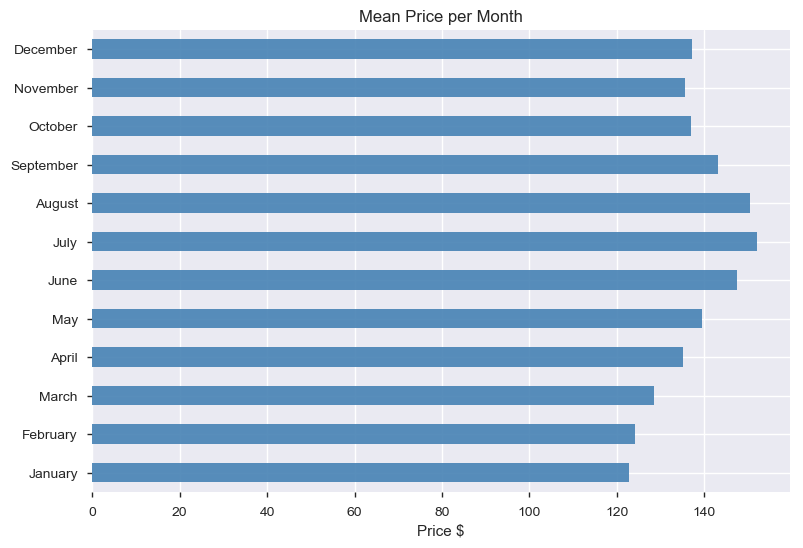

In [42]:
#Average price per month
mean_month.plot(kind = 'barh',figsize=(9,6),alpha=0.9,color='steelblue');
plt.ylabel('');
plt.xlabel('Price $');
plt.title('Mean Price per Month');
plt.show()

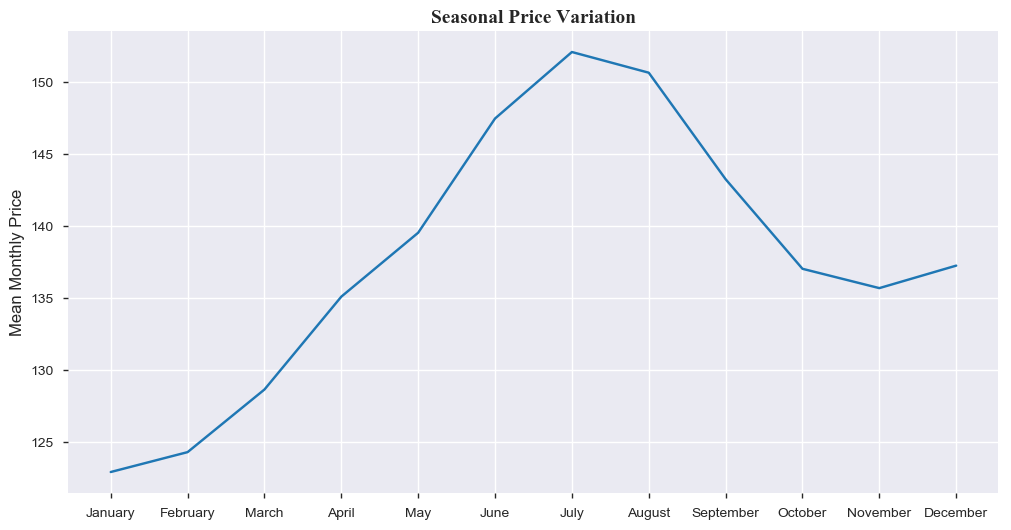

In [43]:
#Seasonal price variation plot
plt.rcParams["figure.figsize"] = [12, 6] 
plt.plot(months, mean_month);
plt.ylabel("Mean Monthly Price",fontsize = 12);
plt.title('Seasonal Price Variation',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");

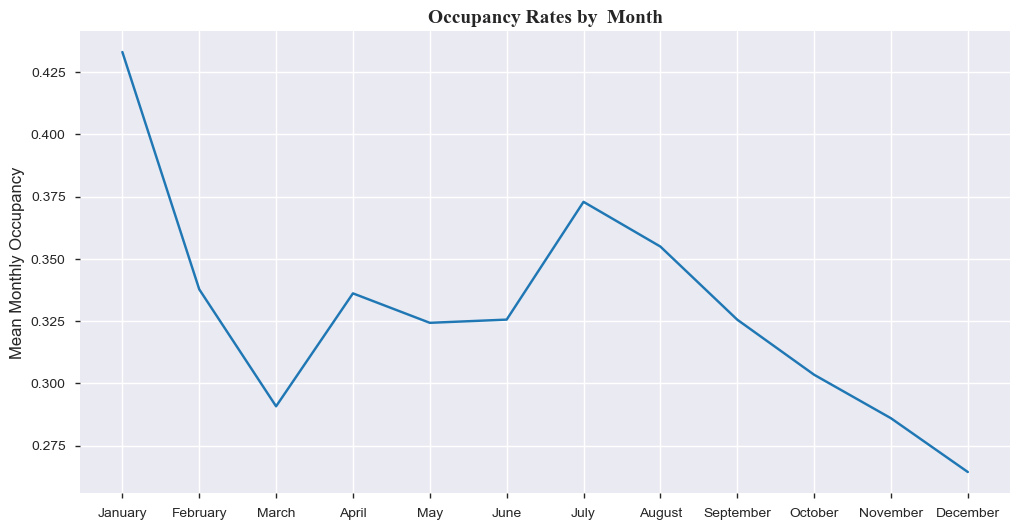

In [44]:
#Occupancy Rate by Month
plt.rcParams["figure.figsize"] = [12, 6] 
plt.plot(occup_month.index, occup_month.values);
plt.ylabel("Mean Monthly Occupancy",fontsize = 12);
plt.title('Occupancy Rates by  Month',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");

In [45]:
#Function for quick count plots
def plot_counts (col,df):
    '''This function creates a bar plot with the counts of unique values of a given variable
    
    Arguments:
    
    df = a Pandas DataFrame containing the data
    col = selected feature to count values '''
    
    df[col].value_counts().sort_values(ascending=True).plot(kind = 'barh' , 
                                                            figsize = (12,8),alpha=0.9,color='steelblue');
    plt.title(col.capitalize(),fontsize = 14,
            fontname="Times New Roman",fontweight="bold");
    plt.show()

In [46]:
df_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 15 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null float64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood                   3817 non-null object
neighbourhood_cleansed          3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
latitude                        3817 non-null float64
longitude                       3817 non-null float64
price                           3817 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 477.1+ KB


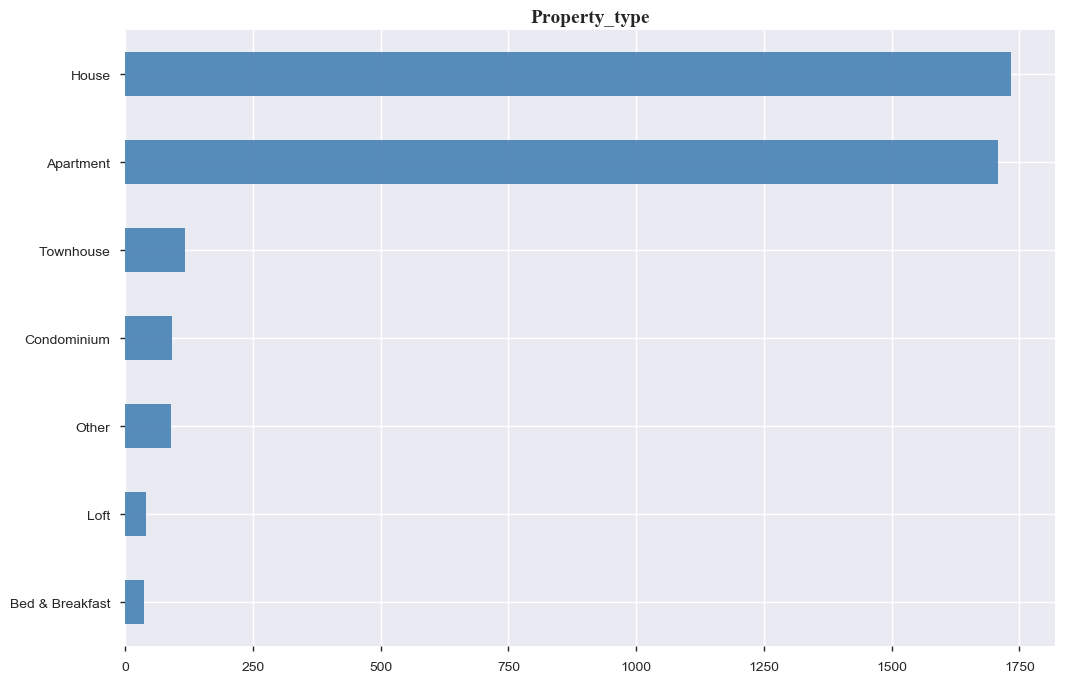

In [47]:
#Plotting the counts of different property types
plot_counts('property_type',df_list_clean)

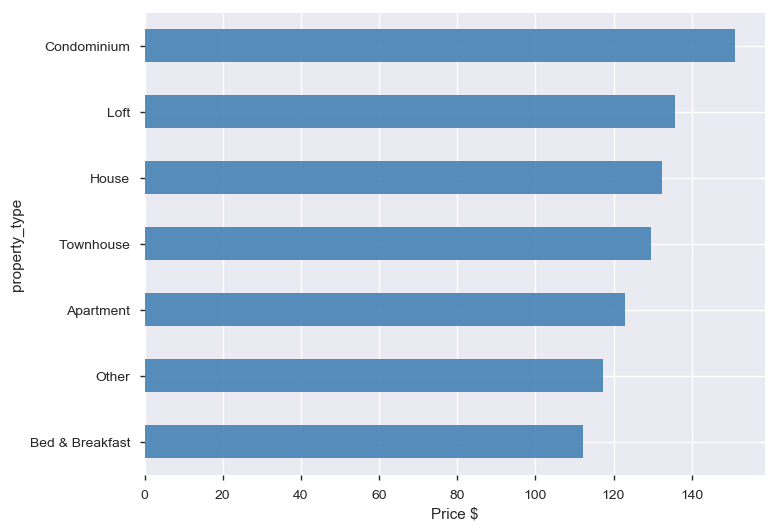

In [48]:
#Let's check how the average price for each property changes
price_property.sort_values(ascending=True).plot(kind = 'barh' , figsize = (8,6),alpha=0.9,color='steelblue');
plt.xlabel('Price $')
plt.show()

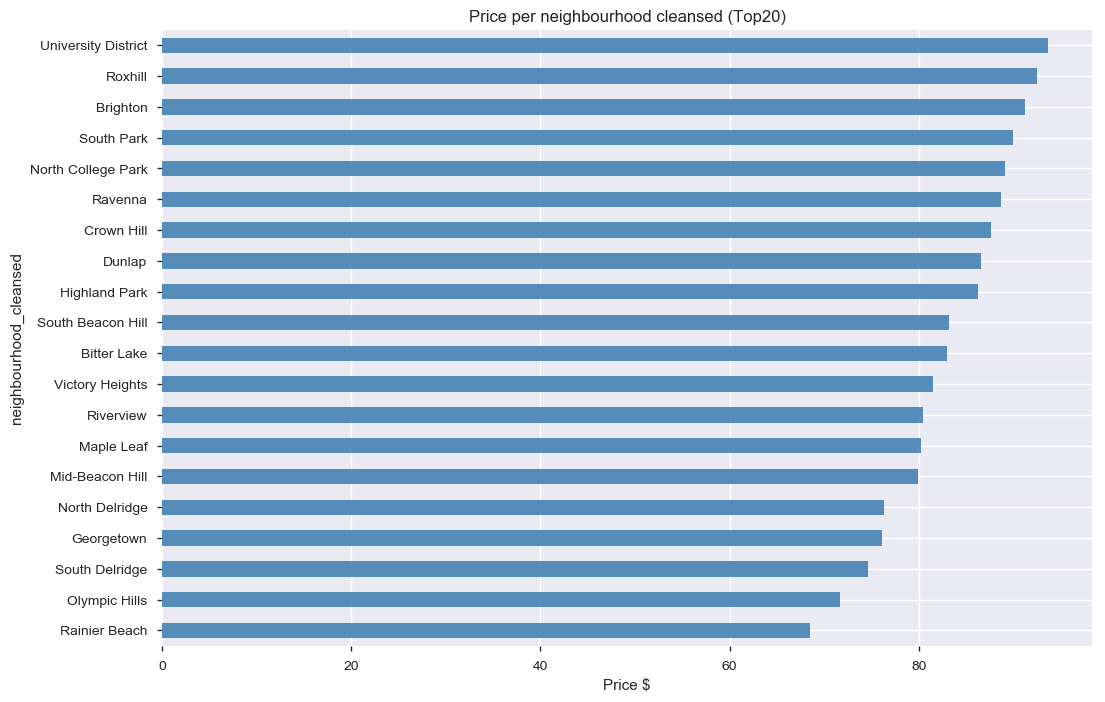

In [49]:
#How does the average rental price changes with the neighbourhood?
price_neigh_cleansed.sort_values(ascending=True).head(20).plot(kind = 'barh' , figsize = (12,8),alpha=0.9,color='steelblue');
plt.xlabel('Price $')
plt.title('Price per neighbourhood cleansed (Top20)')
plt.show()

<a id='p_insights'></a>
## Preliminary Insights
> With the results obtained up to this point, it is possible to answer 4 out of the 5 proposed business questions. Some findings related to each question are the following:
>
>**Seasonal Variation:** there is indeed an average price variation for accommodation rentals in Seattle depending on the month. The peak average prices happen in July, but in general high prices are expected during the whole summer. At the beginning of the year, namely the months of January and February show the lowest average prices of the year. 
>
>**Occupancy rates:** highest occupancy rates are reached during the month of January, with an expected increase during the summer, but in general are relatively low. This finding seems counterintuitive without an understanding of how Airbnb works. Most Airbnb accommodations are used by their owners with a residential more than a commercial purpose, and since “occupancy” is a calculated variable from “availability”, I would say that a high occupancy rate during periods with a low average rental price means that the owners are residing in the property instead of renting it. 
>
>**Popular accommodation types:** this finding helps sustaining my assumption about the unexpected occupancy rates behavior. The two most common accommodation types are “House” and “Apartment”, that is, typical residential properties. Only “Bed & Breakfast” is a property type that one would relate to a mainly commercial accommodation. Additionally, it is important to notice that the two most popular accommodation types are not between the options with the highest average prices. 
>
>**Location:** turns out that the neighborhood where the property is located has a significant influence on price. High prices are expected for locations in the “University District”, “Roxhill” and “Brighton”.


<a id='model'></a>
# Model and Predictive Data Analysis

>In order to find the the most meaningful variables for predicting rental price and thus answering question 5, I will implement a simple machine learning model. Since the goal is predicting price which happens to be a continuous variable(a float) from some selected features, then we are clearly talking about a regression task. Based on the previous exploratory data analysis, there is a strong seasonal price variation with higher price values happening during the summer (june to august). So, the focus here will be on trying to understand the influence other variables have in price. 

<a id='preprocess'></a>
## Data Preparation
> To build a regression model for predicting rental prices, additional data preprocessing steps are needed. Selecting the final features, handling categorical variables, merging datasets and create a final dataset that could be used by a predictive model are all part of this section.

In [50]:
#Creating the final dataframe
df_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 15 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null float64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood                   3817 non-null object
neighbourhood_cleansed          3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
latitude                        3817 non-null float64
longitude                       3817 non-null float64
price                           3817 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 477.1+ KB


In [51]:
#Selecting final features from listings
feats =['id','accommodates','bathrooms','bedrooms','beds','cancellation_policy','host_is_superhost','property_type', 
          'room_type','neighbourhood_group_cleansed']
data_list = df_list_clean[feats]
data_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 10 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null float64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 328.0+ KB


In [52]:
#Selecting features from calendar
df_cal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [53]:
data_cal=df_cal_clean.copy()

In [54]:
#For price prediction, month and weekday are interesting features
data_cal['weekday'] = df_cal_clean['date'].dt.weekday #Monday=0, Sunday=6
data_cal['month'] = df_cal_clean['date'].dt.month
data_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
weekday       934542 non-null int64
month         934542 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 49.9+ MB


In [55]:
data_cal.drop(['date','available'],axis=1,inplace=True)
data_cal.head()

,listing_id,price,weekday,month
0,241032,85.0,0,1
1,241032,85.0,1,1
9,241032,85.0,2,1
10,241032,85.0,3,1
14,241032,85.0,0,1


In [56]:
#Merging the datasets
df_merged=pd.merge(data_cal,data_list,left_on ='listing_id',right_on='id',how='inner')
df_merged.head()

,listing_id,price,weekday,month,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood_group_cleansed
0,241032,85.0,0,1,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne
1,241032,85.0,1,1,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne
2,241032,85.0,2,1,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne
3,241032,85.0,3,1,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne
4,241032,85.0,0,1,241032,4,1.0,1.0,1.0,moderate,0.0,Apartment,Entire home/apt,Queen Anne


In [57]:
# id's are not needed anymore
df_merged.drop(['listing_id','id'],axis=1,inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934233 entries, 0 to 934232
Data columns (total 12 columns):
price                           934233 non-null float64
weekday                         934233 non-null int64
month                           934233 non-null int64
accommodates                    934233 non-null int64
bathrooms                       934233 non-null float64
bedrooms                        934233 non-null float64
beds                            934233 non-null float64
cancellation_policy             934233 non-null object
host_is_superhost               934233 non-null float64
property_type                   934233 non-null object
room_type                       934233 non-null object
neighbourhood_group_cleansed    934233 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 92.7+ MB


In [58]:
#renaming large column name
df_merged.rename(index=str,columns={'neighbourhood_group_cleansed':'place'},inplace=True)

In [59]:
df_final = df_merged.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934233 entries, 0 to 934232
Data columns (total 12 columns):
price                  934233 non-null float64
weekday                934233 non-null int64
month                  934233 non-null int64
accommodates           934233 non-null int64
bathrooms              934233 non-null float64
bedrooms               934233 non-null float64
beds                   934233 non-null float64
cancellation_policy    934233 non-null object
host_is_superhost      934233 non-null float64
property_type          934233 non-null object
room_type              934233 non-null object
place                  934233 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 92.7+ MB


In [60]:
#Selecting categorical variables to re-encode
cat_features=['cancellation_policy','property_type','room_type','place']
df_final = pd.get_dummies(df_merged,columns=cat_features,dummy_na=False)

In [61]:
print(df_final.shape)
df_final.head()

(934233, 38)


,price,weekday,month,accommodates,bathrooms,bedrooms,beds,host_is_superhost,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,property_type_Apartment,property_type_Bed & Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,place_Ballard,place_Beacon Hill,place_Capitol Hill,place_Cascade,place_Central Area,place_Delridge,place_Downtown,place_Interbay,place_Lake City,place_Magnolia,place_Northgate,place_Other neighborhoods,place_Queen Anne,place_Rainier Valley,place_Seward Park,place_University District,place_West Seattle
0,85.0,0,1,4,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,85.0,1,1,4,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,2,1,4,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,85.0,3,1,4,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,85.0,0,1,4,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
#Saving the df_final for later use
file_Name = "df_final.pkl"
# open the file for writing
fileObject = open(file_Name,'wb') 
# writing the object df to the
# file named "df_final.pkl"
pickle.dump(df_final,fileObject)   
# here we close the fileObject
fileObject.close()

In [63]:
data_final=pd.read_pickle("df_final.pkl")
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934233 entries, 0 to 934232
Data columns (total 38 columns):
price                            934233 non-null float64
weekday                          934233 non-null int64
month                            934233 non-null int64
accommodates                     934233 non-null int64
bathrooms                        934233 non-null float64
bedrooms                         934233 non-null float64
beds                             934233 non-null float64
host_is_superhost                934233 non-null float64
cancellation_policy_flexible     934233 non-null uint8
cancellation_policy_moderate     934233 non-null uint8
cancellation_policy_strict       934233 non-null uint8
property_type_Apartment          934233 non-null uint8
property_type_Bed & Breakfast    934233 non-null uint8
property_type_Condominium        934233 non-null uint8
property_type_House              934233 non-null uint8
property_type_Loft               934233 non-null uint8
prop

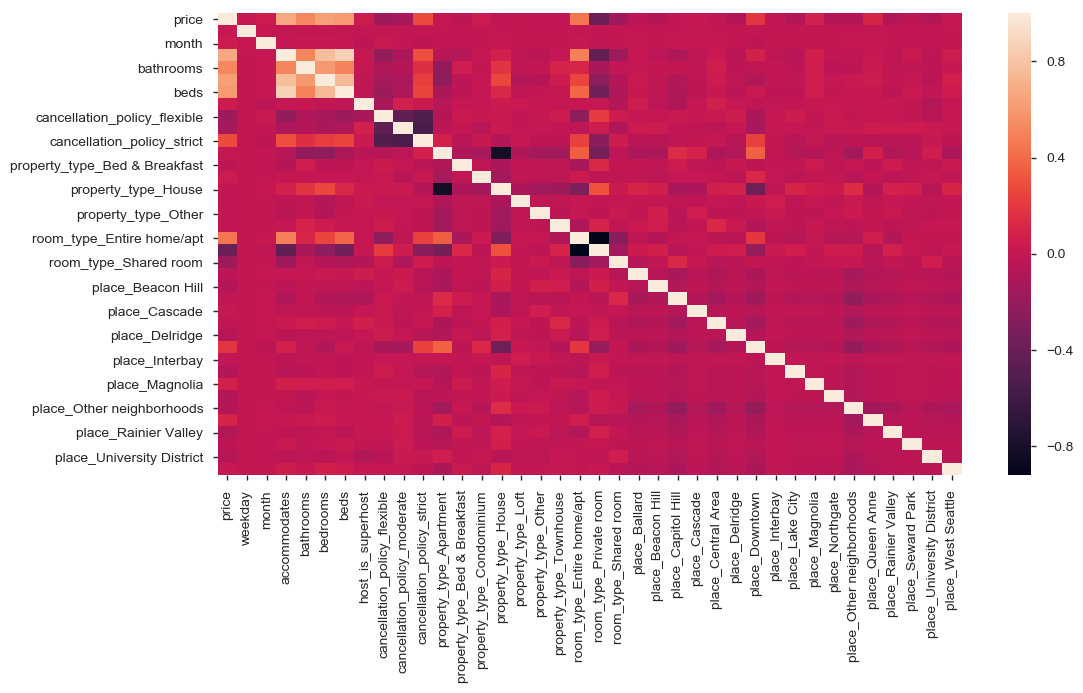

In [64]:
#visualizing correlations between variables.
sns.heatmap(data_final.corr(), annot=False, fmt=".2f");

>From the heatmap that shows correlations between some of the features composing the final dataframe, we can notice that the number of bathrooms, bedrooms, beds and accommodates, all of them a clear indicative of the available space are positively correlated with price. A strict cancellation policy and an entire home/apartment “room type” are also strong correlated with price. Accommodations consisting only in a private or shared room tend to be negatively strong correlated with price.  

In [65]:
#Quick profile check of the resulting df
pandas_profiling.ProfileReport(data_final)

Number of variables,39
Number of observations,934233
Total Missing (%),0.0%
Total size in memory,90.9 MiB
Average record size in memory,102.0 B
Numeric,7
Categorical,0
Boolean,31
Date,0
Text (Unique),1
Rejected,0


In [66]:
# Split the data into features and target label
target = data_final['price']
features = data_final.drop('price', axis = 1)

<a id='implementation'></a>
## Model Selection and Implementation
> For this dataset I will use a linear regression model, starting with a simple linear model and then testing additional ridge variations.

In [67]:
#Selecting the features and target labels
X = features
y= target
#Split into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [68]:
#Function for model training and prediction
def train_predict(model):
    
    '''This function takes a model as argument, trains the model using the training set 
    then makes predictions with the testing set, calculates the train and test scores
    and finally prints the score results    '''
    
    model_name = model.__class__.__name__
    #training the model
    model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)

    #Score the model
    #test data
    test_score_r2 = r2_score(y_test, y_test_preds)
    test_score_mse = mean_squared_error(y_test, y_test_preds)
    #training data
    train_score_r2 = r2_score(y_train, y_train_preds)
    train_score_mse = mean_squared_error(y_train, y_train_preds)

    #Print training and testing score
    print('\nResults for {} Model:\n'.format(model_name))
    print("The R^2 score on the training data was {:.4f}.  The R^2 score on the test data was {:.4f}.\n".format(train_score_r2, test_score_r2))
    print("The mean_squared_error on the training data was {:.4f}.  The mean_squared_error on the test data was {:.4f}.\n".format(train_score_mse, test_score_mse))

<a id='evaluation'></a>
## Evaluating Model Performance

In [69]:
#Instantiatng models with default parameters
M1 = LinearRegression(normalize=True) #linear regression
M2 = Ridge(random_state=42,normalize=True) #ridge regression
#M3 = Lasso(random_state=42)#,normalize=True) #lasso regression
#Note: setting 'normalize=True' in Lasso yields a R^2=0
for model in [M1,M2]:
    train_predict(model)


Results for LinearRegression Model:

The R^2 score on the training data was 0.5999.  The R^2 score on the test data was 0.5993.

The mean_squared_error on the training data was 4447.0623.  The mean_squared_error on the test data was 4357.2383.


Results for Ridge Model:

The R^2 score on the training data was 0.5564.  The R^2 score on the test data was 0.5574.

The mean_squared_error on the training data was 4930.1338.  The mean_squared_error on the test data was 4811.9963.



>**Model Performance:** Based on the results of this simple model implementation, I will try to optimize the ridge model to see if it is possible to increase the R^2 score

In [70]:
#Unoptimized model
clf= Ridge(random_state=42,normalize=True)

parameters={'alpha': [10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.001,0.0001]}

# TODO: Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters,scoring=scorer,cv=2,verbose=1)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R^2 score on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final R^2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   37.7s finished


Unoptimized model
------
R^2 score on testing data: 0.5574

Optimized Model
------
Final R^2 score on the testing data: 0.5993


In [71]:
#Unoptimized Model
clf

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='auto', tol=0.001)

In [72]:
#Optimized Model
best_clf

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='auto', tol=0.001)

>**Model Optimization Results:** Since the optimized Ridge model performs similar to the simple linear regression model, I will continue the analysis using the linear model. 

In [73]:
#Feature Importance
lm_model = M1 #M1 = LinearRegression(normalize=True) 
#Getting the coefficients
coef = lm_model.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [74]:
#Creating a dataframe of coefficient's values
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    
    Original Function taken from: Udacity, Data Science ND, Lesson 1: The Data Science Process.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [75]:
#Use the function
coef_df = coef_weights(coef, X_train)
#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
9,cancellation_policy_strict,9.261260e+13,9.261260e+13
7,cancellation_policy_flexible,9.261260e+13,9.261260e+13
8,cancellation_policy_moderate,9.261260e+13,9.261260e+13
14,property_type_Loft,7.600265e+13,7.600265e+13
15,property_type_Other,7.600265e+13,7.600265e+13
11,property_type_Bed & Breakfast,7.600265e+13,7.600265e+13
12,property_type_Condominium,7.600265e+13,7.600265e+13
13,property_type_House,7.600265e+13,7.600265e+13
10,property_type_Apartment,7.600265e+13,7.600265e+13
16,property_type_Townhouse,7.600265e+13,7.600265e+13


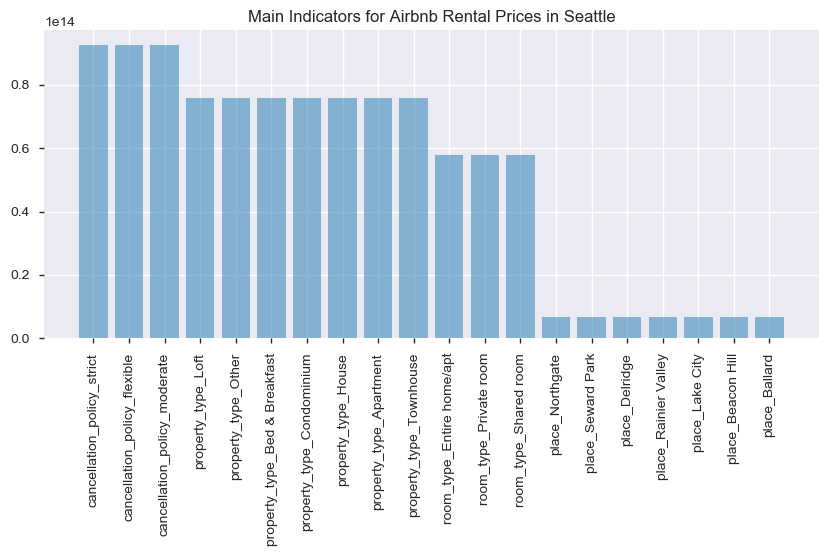

In [76]:
#Plotting the coefficients
plt.rcParams["figure.figsize"] = [10, 4] 
coef_objects=coef_df['est_int'].head(20)
y_pos=np.arange(len(coef_objects))
coef_values=coef_df['abs_coefs'].head(20)
plt.bar(y_pos,coef_values,align='center',alpha=0.5);
plt.xticks(y_pos,coef_objects,rotation=90);
plt.title('Main Indicators for Airbnb Rental Prices in Seattle',fontsize=12)
plt.show();

>At this point we can answer the 5th and final question. Based on the modeling results, the cancellation policy, property and room type are variables that play an important role when predicting rental prices in Seattle. In addition to those variable, location is also an important variable for predicting prices.  

<a id='results'></a>
# Results


Let's summarize the final results and answer the 5 proposed business questions. 

**1.	Seasonal Variations: How price changes through the year? Are there seasonal price variations?**

**Seasonal Variation:** there is indeed an average price variation for accommodation rentals in Seattle depending on the month. The peak average prices happen in July, but in general high prices are expected during the whole summer. At the beginning of the year, namely the months of January and February show the lowest average prices of the year. 

**2.	Occupancy rates: What are the busiest times of the year to visit Seattle?**

**Occupancy rates:** highest occupancy rates are reached during the month of January, with an expected increase during the summer, but in general are relatively low. This finding seems counterintuitive without an understanding of how Airbnb works. Most Airbnb accommodations are used by their owners with a residential more than a commercial purpose, and since “occupancy” is a calculated variable from “availability”, I would say that a high occupancy rate during periods with a low average rental price means that the owners are residing in the property instead of renting it. 

**3.	Popular accommodation types: What are the accommodation options available in Seattle?**

**Popular accommodation types:** this finding helps sustaining my assumption about the unexpected occupancy rates behavior. The two most common accommodation types are “House” and “Apartment”, that is, typical residential properties. Only “Bed & Breakfast” is a property type that one would relate to a mainly commercial accommodation. Additionally, it is important to notice that the two most popular accommodation types are not between the options with the highest average prices.

**4.	Location: Are there significant price variations depending on the neighborhood? Which are the areas with the highest average prices?**

**Location:** turns out that the neighborhood where the property is located has a significant influence on price. High prices are expected for locations in the “University District”, “Roxhill” and “Brighton”.

**5.	Predicting prices: What factors have a stronger influence on price?** 

**Influential Features:** Based on the modeling results, the cancellation policy, property and room type are variables that play an important role when predicting rental prices in Seattle. In addition to those variables, location is also an important variable for predicting prices. From the heatmap that shows correlations between some of the features composing the final dataframe, we can notice that the number of bathrooms, bedrooms, beds and accommodates, all of them a clear indicative of the available space are positively correlated with price. A strict cancellation policy as well as an entire home/apartment “room type” are also strong correlated with price. Accommodations consisting only in a private or shared room tend to be negatively correlated with price, or in simple terms, they are cheaper!

In summary, we can clearly see that in Seattle, we would need to budget extra money when renting an entire home or apartment with a strict cancellation policy, located in or near the University District during the summer season. 

<a id='reference'></a>
# References
* [Dataset](https://www.kaggle.com/airbnb/seattle)
* [Udacity Data Science ND Program](https://classroom.udacity.com/nanodegrees/nd025/syllabus/core-curriculum)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [Own reused code from:github.com/gcedeno](https://github.com/gcedeno)
* [Speed up Data Analysis in Python](https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-python-ec18c6396e6b)
* [Pandas Profiling Documentation](https://pandas-profiling.github.io/pandas-profiling/docs/)
* [A Complete Tutorial on Ridge and Lasso Regression in Python](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)
* [Regularization. Clarified.](https://medium.com/data-science-group-iitr/regularization-a-smooth-trick-to-increase-robustness-of-regression-models-a5e8a91737ff)
* [Ridge Regression for Better Usage](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db)
* [Selecting features for linear models](https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization)